In [25]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import numpy as np
from scipy import interpolate
import peakutils
import rfi
import turbo_seti
import pandas as pd
import BaselineRemoval
from scipy.sparse import csc_matrix, eye, diags
from scipy.sparse.linalg import spsolve
import matplotlib
from astropy.time import Time
from astropy import units as u
import scipy
import os

extracting integration 0...


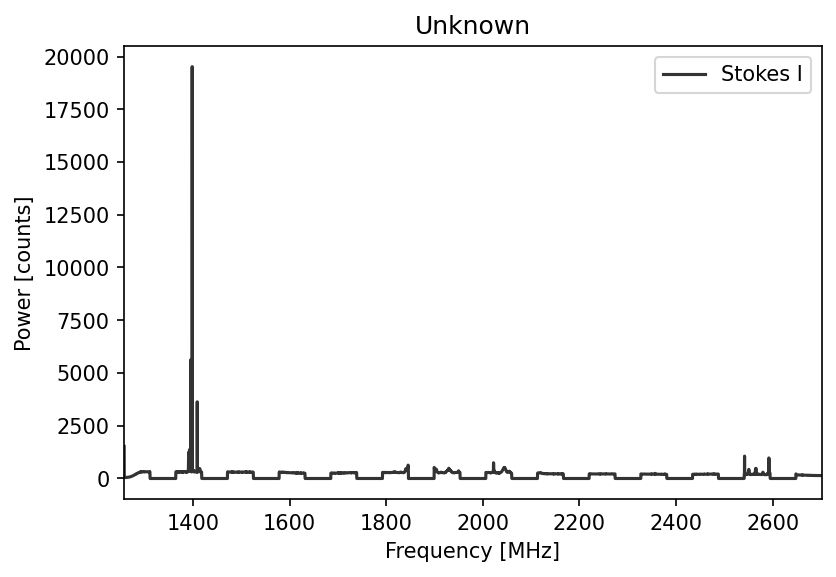

In [5]:
plt.figure(dpi=150)
w=Waterfall('data/guppi_58897_47487_005341_Unknown_0001-ics.rawspec.0000.combined.fil')
w.plot_spectrum()

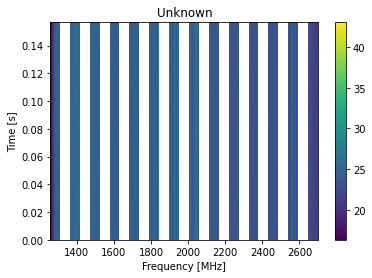

In [13]:
w.plot_waterfall()

array([1257.35449219, 1390.26855469, 1390.47753906, 1390.68652344,
       1390.89550781, 1391.10449219, 1391.31347656, 1391.52246094,
       1391.73144531, 1391.94042969, 1392.14941406, 1392.35839844,
       1392.56738281, 1392.77636719, 1392.98535156, 1393.19433594,
       1393.40332031, 1393.61230469, 1393.82128906, 1394.03027344,
       1394.23925781, 1394.44824219, 1394.65722656, 1394.86621094,
       1395.07519531, 1397.37402344, 1397.58300781, 1397.79199219,
       1398.00097656, 1398.20996094, 1398.41894531, 1401.97167969,
       1408.45019531, 1408.65917969, 1410.54003906, 1410.74902344,
       1410.95800781, 1411.16699219, 1411.37597656, 1411.58496094,
       1411.79394531, 1412.00292969, 1412.21191406, 1412.42089844,
       1412.62988281, 1412.83886719, 1413.04785156, 1413.25683594,
       1413.46582031, 1413.67480469, 1413.88378906, 1414.09277344,
       1414.30175781, 1839.16699219, 1839.37597656, 1839.58496094,
       1839.79394531, 1840.00292969, 1840.21191406, 1840.42089

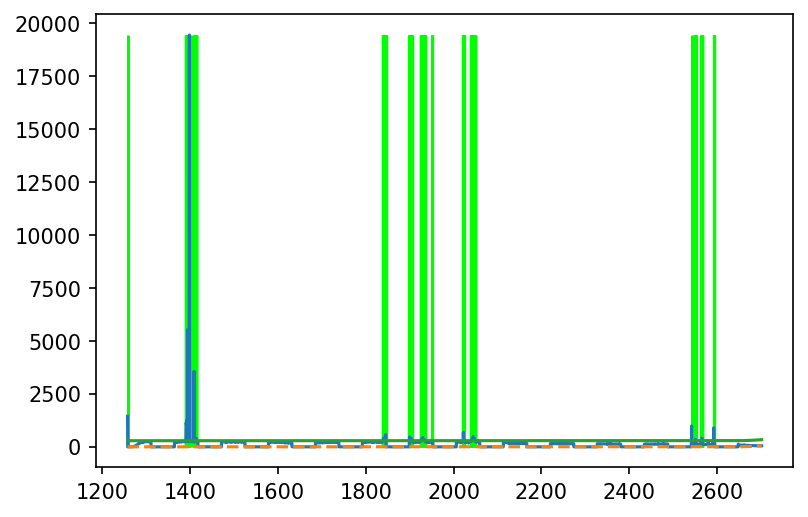

In [12]:
plt.figure(dpi=150)
f,p,base=rfi.base(w)
thres=1.0*(p-base).std()
plt.plot(f,p,f,base,'--')
plt.plot(f,thres+base,)
fi=f[np.where((p-base)>thres)]
plt.vlines(fi,0,np.amax(p),'lime')
fi

In [10]:
fi=rfi.intersection(w)
test=[]
flag=fi[-1]
while True:
    start=fi[0]
    if len(fi)==1:
        end=fi[0]
        test.append([start,end])
        break
    for i in range(len(fi)-1):
        if abs(fi[i+1]-fi[i])>abs(w.header['foff']):
            end=fi[i]#+w.header['foff']
            fi=fi[i+1:]
            test.append([start,end])
            break
        else:
            end=fi[i+1]
    if end==flag:
        test.append([start,end])
test

[[823.96875, 827.15625],
 [828.21875, 828.21875],
 [901.53125, 906.3125],
 [908.4375, 908.4375],
 [909.5, 909.5],
 [912.6875, 912.6875]]

In [11]:
ntest=rfi.rfi_range(w)
ntest

[[823.96875, 827.15625],
 [828.21875, 828.21875],
 [901.53125, 906.3125],
 [908.4375, 908.4375],
 [909.5, 909.5],
 [912.6875, 912.6875]]

In [12]:
test==ntest

True

In [15]:
np.flip(p)

array([  49.23042685,   46.93945458,   49.70568312, ...,    0.        ,
          0.        , 1442.56537884])

In [26]:
for key, val in w.file_header.items():
    if key == 'src_raj':
        val = val.to_string(unit=u.hour, sep=':')
    if key == 'src_dej':
        val = val.to_string(unit=u.deg, sep=':')
    if key in ('foff', 'fch1'):
        val *= u.MHz
    if key == 'tstart':
        print("%16s : %32s" % ("tstart (ISOT)", Time(val, format='mjd').isot))
        key = "tstart (MJD)"
    print("%16s : %32s" % (key, val))

      machine_id :                               20
    telescope_id :                               -1
       data_type :                                1
            fch1 :              1257.3544921875 MHz
            foff :                  0.208984375 MHz
          nchans :                             6912
     source_name :                          Unknown
         src_raj :                       4:08:29.73
         src_dej :                      -65:42:24.6
        az_start :                              0.0
        za_start :                              0.0
           nbits :                               32
   tstart (ISOT) :          2020-02-18T13:11:28.000
    tstart (MJD) :               58897.549629629626
           tsamp :              0.00979977570093458
            nifs :                                1


In [28]:
type(w.file_header.get('tstart'))

float